In [1]:
import pickle
import os
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from tqdm import tqdm
import itertools
from scipy import sparse
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier , RandomForestClassifier
from matplotlib import pyplot
from sklearn import metrics
from sklearn import preprocessing
# from mlxtend.classifier import StackingCVClassifier 
from sklearn.preprocessing import StandardScaler  
project_folder = "."



In [2]:
import pickle

with open(os.path.join(project_folder,"data","train_test_columns.pkl"), "rb") as f:
    X_train, X_test, y_train, y_test, columns = pickle.load(f)

In [3]:
X_train_array = X_train.toarray()
X_test_array = X_test.toarray()

In [4]:
scaler = StandardScaler()
X_train_array = scaler.fit_transform(X_train_array)
X_test_array = scaler.transform(X_test_array)

In [5]:

thresholds = list(np.arange(0.01, 1.01, 0.01))

 

# y_hat_proba = best_estimator.predict_proba(X_test_array)

 

#Pass in a single dim array from predict
# y_hat[:,1]
def calcCost(truth, probabilities, threshold, fp = 10, fn = 500):
    y_hat = (probabilities > threshold).astype(int)
    mt = metrics.confusion_matrix(truth, y_hat)
    acc = metrics.accuracy_score(truth, y_hat)
    recall = metrics.recall_score(truth, y_hat)
    return {
        "probability":threshold,
        "accuracy": acc,
        "recall": recall,
        "fn":mt[1,0],
        "fn_cost":mt[1,0]*fn,
        "fp":mt[0,1],
        "fp_cost":mt[0,1]*fp
    }

 



In [6]:
with open(os.path.join(project_folder,"models","best_stack_model.pkl"), "rb") as f:
    best_model = pickle.load(f)

In [ ]:
y_hat_proba = best_model.predict_proba(X_test_array)

In [7]:
### Global Imports

import fatf
import sys
import numpy as np
import fatf.vis.lime as fatf_vis_lime
import fatf.transparency.predictions.surrogate_explainers as fatf_surrogates
import fatf.transparency.models.feature_influence as fatf_fi
import fatf.transparency.predictions.counterfactuals as fatf_cf
import fatf.transparency.models.feature_influence as fatf_fi
from pprint import pprint

### Imports for Plotly
import plotly.graph_objects as go
    

20-Aug-09 17:27:29 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


In [18]:
### PDP Eval     

def meval_pdp(dataset,clf,samples):
    
## Initialize the arrays

    clf_probablities_out = []
    linspace_examples_out = []
    
## Run the Evaluation

    for feature in range(len(dataset[0])):

    # Calculate Partial Dependence
        clf_probablities, linspace_examples = fatf_fi.partial_dependence(
            dataset, clf, feature, steps_number = samples)

        clf_probablities_out.append(clf_probablities)
        linspace_examples_out.append(linspace_examples)
    
    
    return clf_probablities_out

In [23]:
pdp_output = meval_pdp(dataset=X_test_array,
          clf=best_model,
          samples=100)

/Users/shantanu/opt/anaconda3/envs/QTW/lib/python3.7/site-packages/fatf/utils/models/validation.py:78: UserWarning: The 'predict' method of the *StackingClassifier* (model) class has incorrect number (3) of the required parameters. It needs to have exactly 1 required parameter(s). Try using optional parameters if you require more functionality.
The 'predict_proba' method of the *StackingClassifier* (model) class has incorrect number (2) of the required parameters. It needs to have exactly 1 required parameter(s). Try using optional parameters if you require more functionality.
  warnings.warn(message, category=UserWarning)


IncompatibleModelError: This functionality requires the model to be capable of outputting probabilities via predict_proba method.

In [30]:

df_data = pd.DataFrame(X_test.toarray(), columns = columns)

In [31]:
df_data.head()

,x0,x1,x2,x3,x4,x5,x7,x8,x9,x10,...,x29_NA,x29_Nov,x29_Oct,x29_sept.,x30_NA,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
0,0.486529,9.098311,-7.470779,0.034097,3.886083,-4.575658,-44.726858,19.655399,-14.378921,-13.913873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.461455,0.026873,-5.935335,2.915430,3.289183,3.063129,-27.234664,-9.179516,5.925319,-13.190074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.442175,12.182910,-13.559446,8.084825,0.394914,-1.715444,-3.202094,0.996137,2.279090,-0.328900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.215861,10.939226,-0.551628,-1.050447,0.162370,-8.124286,9.946329,0.538866,-1.415132,5.803521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.143727,0.707760,11.547092,19.225448,-5.236735,4.806027,8.476797,-12.960573,-2.732129,-13.976770,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
df_random = df_data.sample(1000)

Computing partial dependence plots...
done in 4.976s


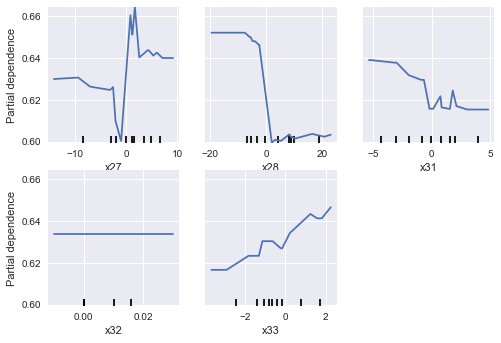

In [48]:
from sklearn.inspection import plot_partial_dependence
import time

"""
Assuming we prepared the data from NY taxi fare data set and 
trained the model as 'reg' just as in the code of variable importance.
"""

# Check how long does it take.
print('Computing partial dependence plots...')
tic = time.time()

partial_plots = plot_partial_dependence(best_model, df_random.iloc[:20], df_data.columns[25:30],
                        n_jobs=-1, fig=None)

print("done in {:.3f}s".format(time.time() - tic))

# fig = plt.gcf()
# fig.suptitle('Partial dependence of NY taxi fare data - 1D')
# fig.subplots_adjust(wspace=0.4, hspace=0.8)
# plt.show()

In [35]:
partial_plots

In [44]:
partial_plots.pd_results

[(array([[0.56751007, 0.56754527, 0.56754525, 0.56754523, 0.56727044,
          0.56702111, 0.56702109, 0.56706895, 0.56722305, 0.56722303,
          0.56722301, 0.56722299, 0.56722297, 0.56742383, 0.56742381,
          0.56745047, 0.56745045, 0.56748526, 0.56746335, 0.56746333,
          0.56746331, 0.56746329, 0.56746327, 0.56746325, 0.56746322,
          0.5674632 , 0.56763214, 0.56763212, 0.5676321 , 0.56753038,
          0.5676872 , 0.56768718, 0.5677285 , 0.56772848, 0.56772846,
          0.56772844, 0.56762894, 0.56762891, 0.56778471, 0.56778469,
          0.56778467, 0.56807771, 0.56807768, 0.56807766, 0.56807764,
          0.56815554, 0.56815552, 0.5681555 , 0.56820638, 0.56820636,
          0.56820634, 0.56824542, 0.56823231, 0.56820204, 0.56820202,
          0.568202  , 0.56820198, 0.56818165, 0.56818163, 0.56818161,
          0.56850654, 0.56850652, 0.5685065 , 0.56850648, 0.56850646,
          0.56850644, 0.56850642, 0.56846299, 0.56846297, 0.56846295,
          0.56846293

In [45]:
partial_plots = plot_partial_dependence(best_model, df_random.iloc[:10], df_data.columns[3],
                        n_jobs=-1, fig=None)

ValueError: Feature x not in feature_names